In [ ]:
from matplotlib import pyplot as plt
from superlet import superlet, scale_from_period
import mne 
from mne import create_info
import numpy as np
from burst_detection import extract_bursts
from fooof import FOOOF
from autoreject import AutoReject
import scipy.io

import pandas as pd
from matplotlib import ticker
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import os
from pathlib import Path

['sub-AL08AS02', 'sub-KE05AN23']
Reading /Users/zayneb/Library/Mobile Documents/com~apple~CloudDocs/06.INTERNSHIPS/ISC_DANC_LAB/le_zay/derivatives/burstspipeline/sub-AL08AS02/sub-AL08AS02_desc-epochs_eeg.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
254 matching events found
No baseline correction applied
0 projection items activated
Loaded sub-AL08AS02: <EpochsFIF | 254 events (all good), -1 – 1.5 s (baseline -0.2 – 0 s), ~72.9 MiB, data loaded,
 '106': 10
 '107': 11
 '109': 19
 '116': 2
 '117': 37
 '119': 3
 '126': 3
 '127': 35
 '129': 3
 '136': 3
 and 2 more events ...>


/var/folders/yf/nzb3h5md40v2gd860y7tqqmm0000gn/T/ipykernel_45256/779980959.py:28: RuntimeWarning: This filename (/Users/zayneb/Library/Mobile Documents/com~apple~CloudDocs/06.INTERNSHIPS/ISC_DANC_LAB/le_zay/derivatives/burstspipeline/sub-AL08AS02/sub-AL08AS02_desc-epochs_eeg.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_file, preload=True)



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a low

/var/folders/yf/nzb3h5md40v2gd860y7tqqmm0000gn/T/ipykernel_45256/779980959.py:173: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


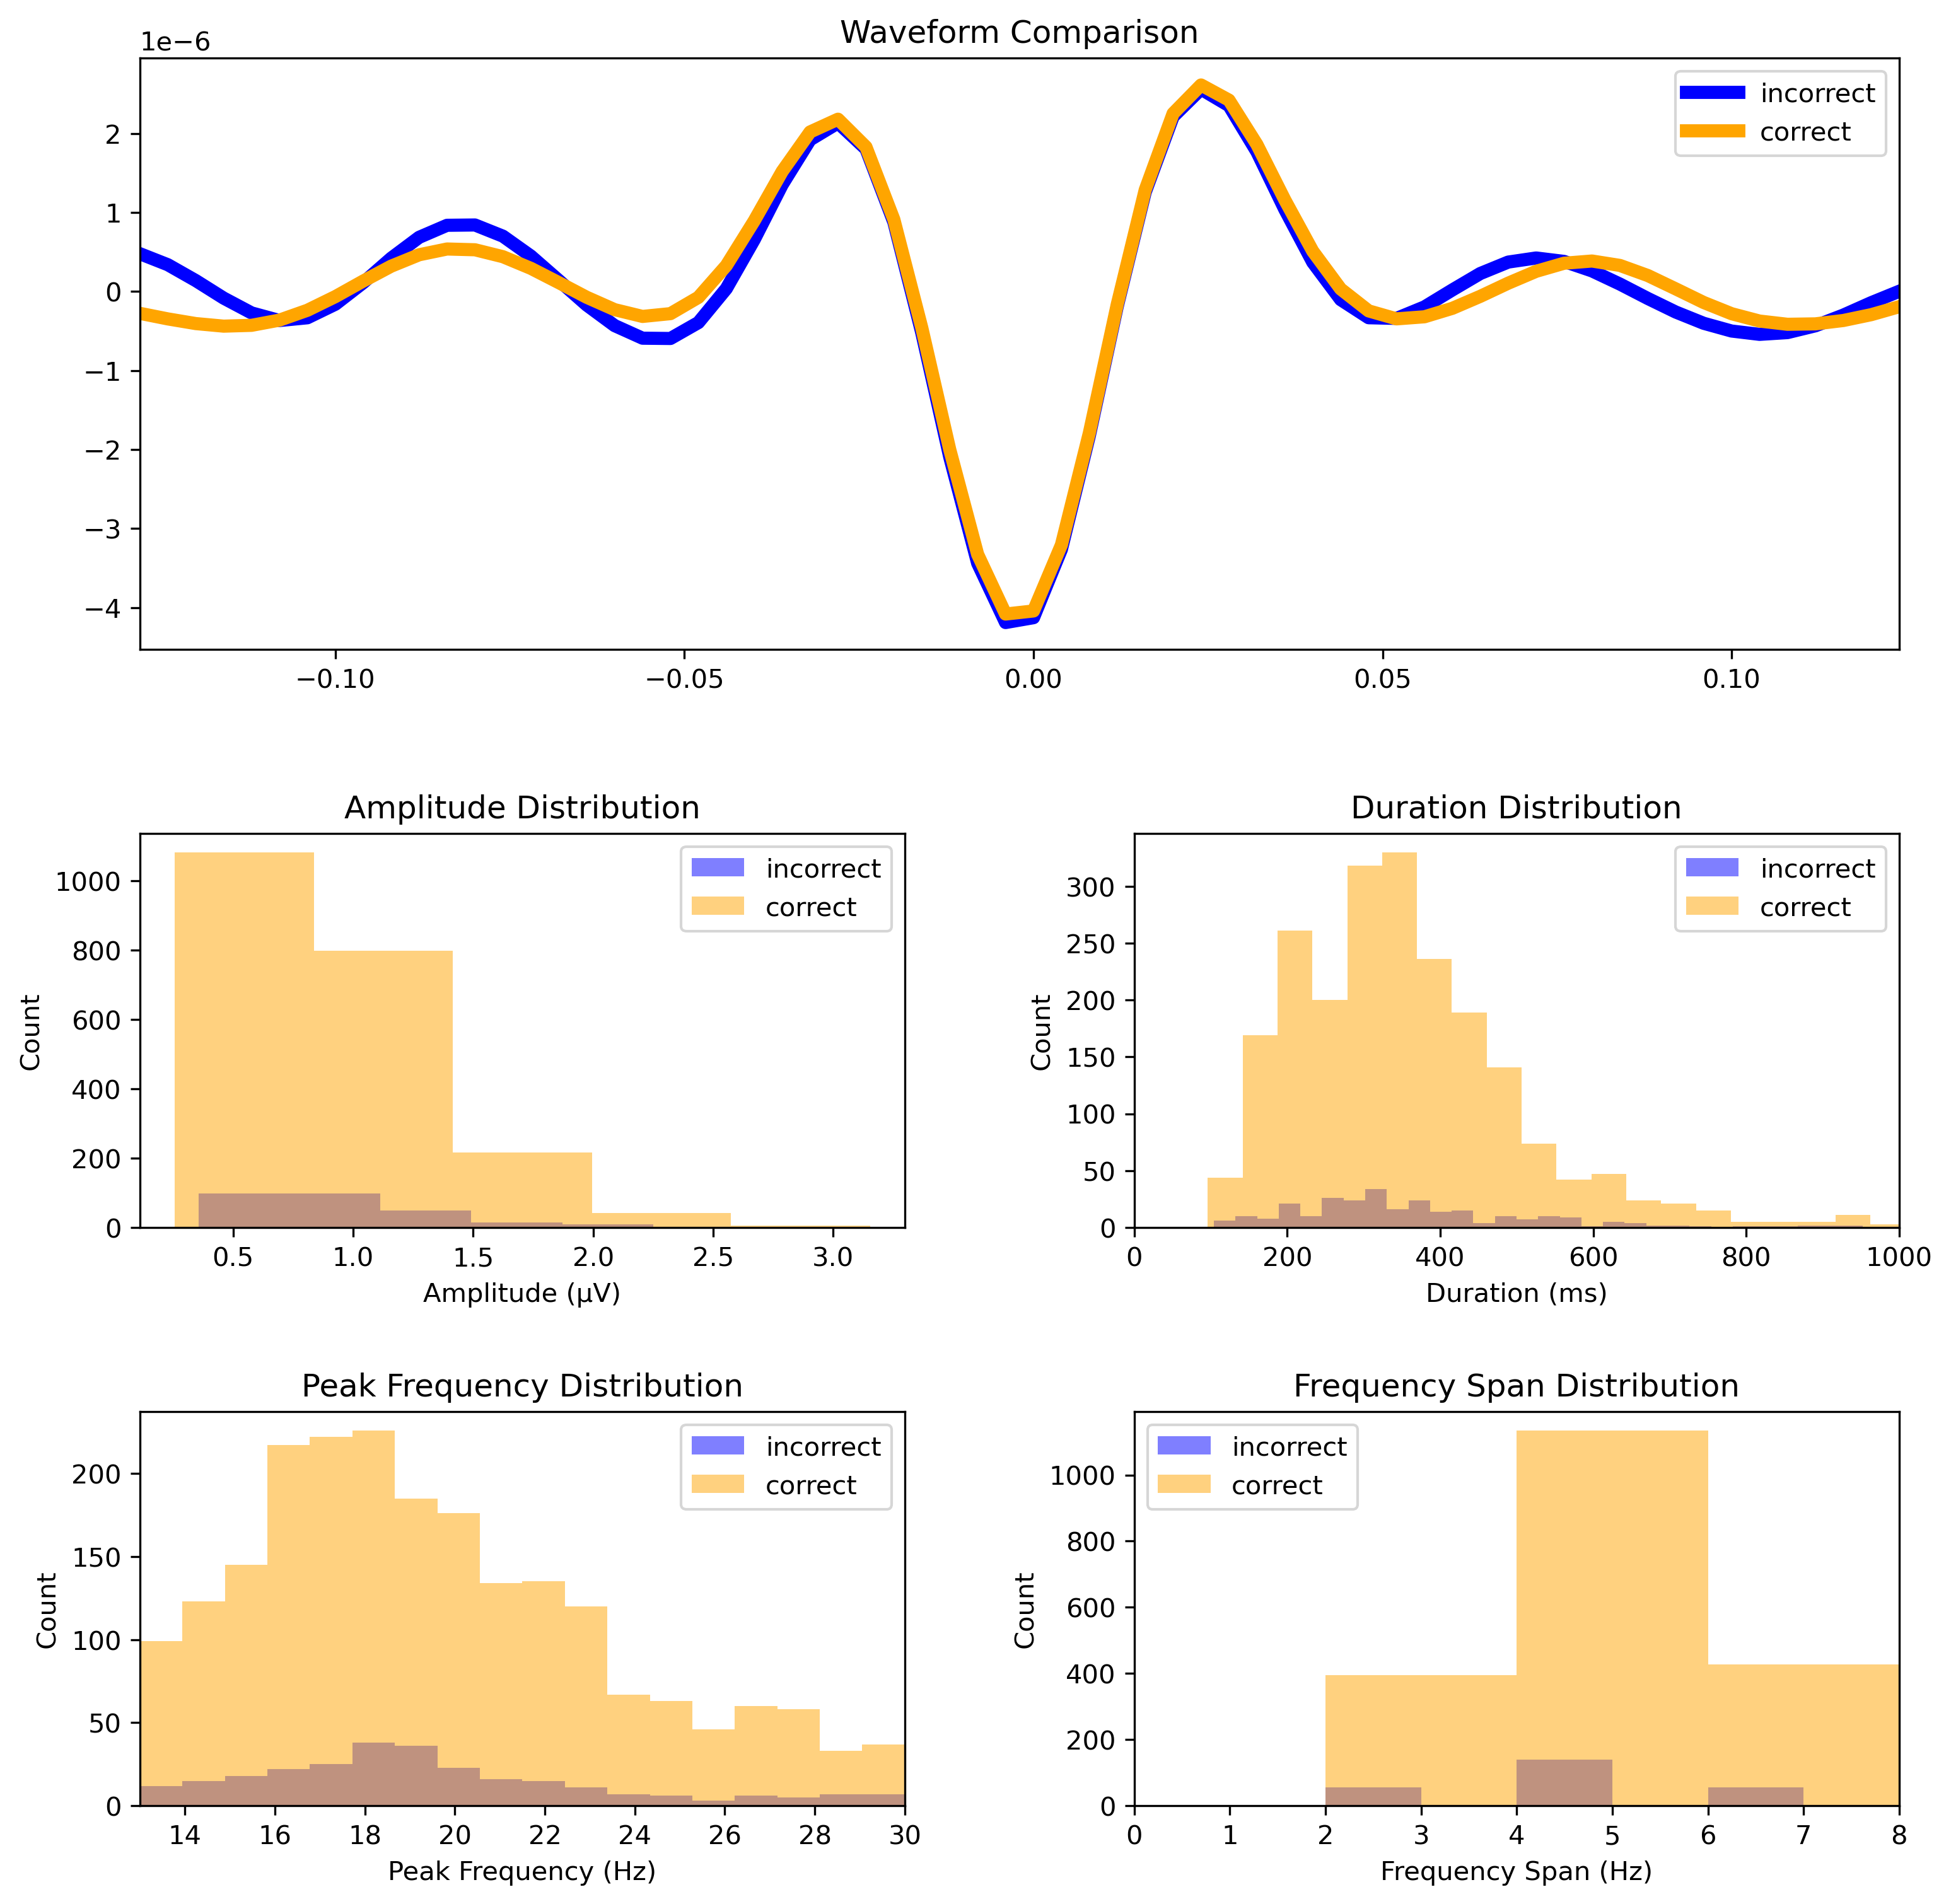

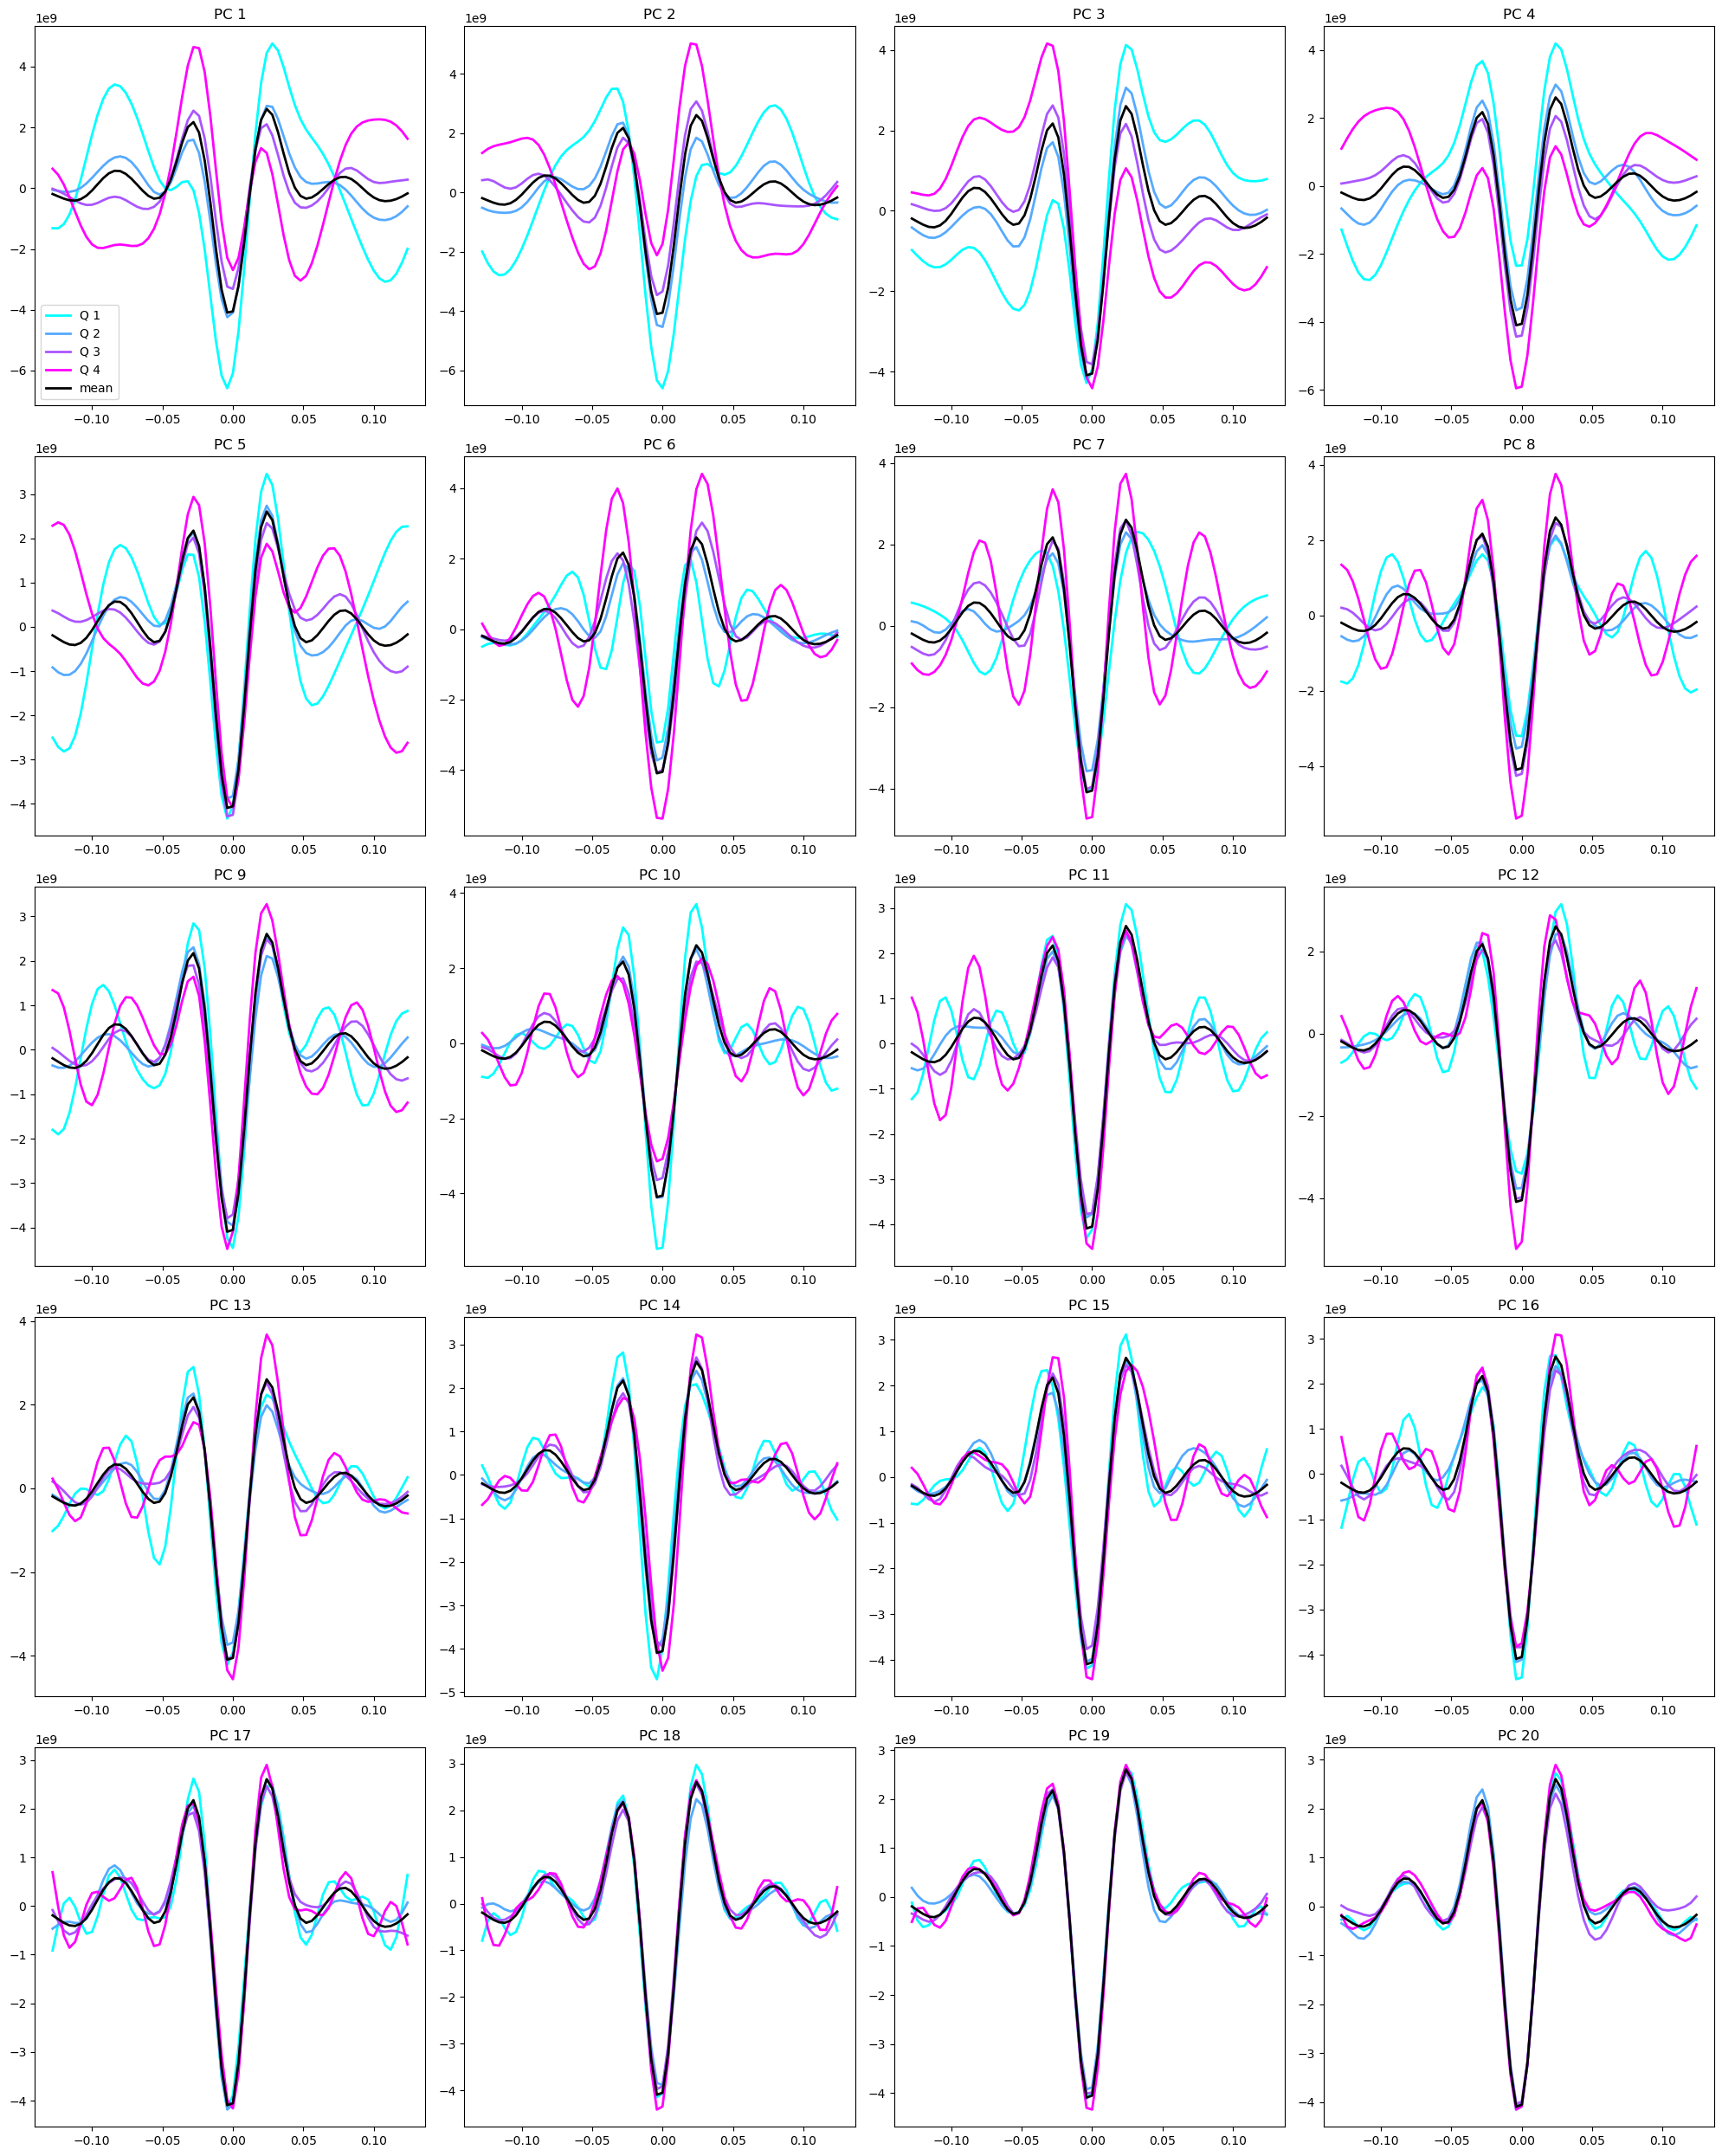

Reading /Users/zayneb/Library/Mobile Documents/com~apple~CloudDocs/06.INTERNSHIPS/ISC_DANC_LAB/le_zay/derivatives/burstspipeline/sub-KE05AN23/sub-KE05AN23_desc-epochs_eeg.fif ...
    Found the data of interest:
        t =   -1000.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
250 matching events found
No baseline correction applied
0 projection items activated


/var/folders/yf/nzb3h5md40v2gd860y7tqqmm0000gn/T/ipykernel_45256/779980959.py:28: RuntimeWarning: This filename (/Users/zayneb/Library/Mobile Documents/com~apple~CloudDocs/06.INTERNSHIPS/ISC_DANC_LAB/le_zay/derivatives/burstspipeline/sub-KE05AN23/sub-KE05AN23_desc-epochs_eeg.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(epochs_file, preload=True)


Loaded sub-KE05AN23: <EpochsFIF | 250 events (all good), -1 – 1.5 s (baseline -0.2 – 0 s), ~71.7 MiB, data loaded,
 '106': 2
 '107': 15
 '109': 26
 '116': 4
 '117': 30
 '119': 6
 '126': 1
 '127': 37
 '129': 5
 '136': 1
 and 2 more events ...>

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.


FOOOF WARNING: Lower-bound peak width limit is < or 

/Users/zayneb/Library/Mobile Documents/com~apple~CloudDocs/06.INTERNSHIPS/ISC_DANC_LAB/le_zay/burst_detection.py:80: RuntimeWarning: All-NaN axis encountered
  vert = np.nanmin([up_loc, down_loc])



FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 1.00
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



/Users/zayneb/Library/Mobile Documents/com~apple~CloudDocs/06.INTERNSHIPS/ISC_DANC_LAB/le_zay/burst_detection.py:80: RuntimeWarning: All-NaN axis encountered
  vert = np.nanmin([up_loc, down_loc])
/Users/zayneb/Library/Mobile Documents/com~apple~CloudDocs/06.INTERNSHIPS/ISC_DANC_LAB/le_zay/burst_detection.py:80: RuntimeWarning: All-NaN axis encountered
  vert = np.nanmin([up_loc, down_loc])
/var/folders/yf/nzb3h5md40v2gd860y7tqqmm0000gn/T/ipykernel_45256/779980959.py:173: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


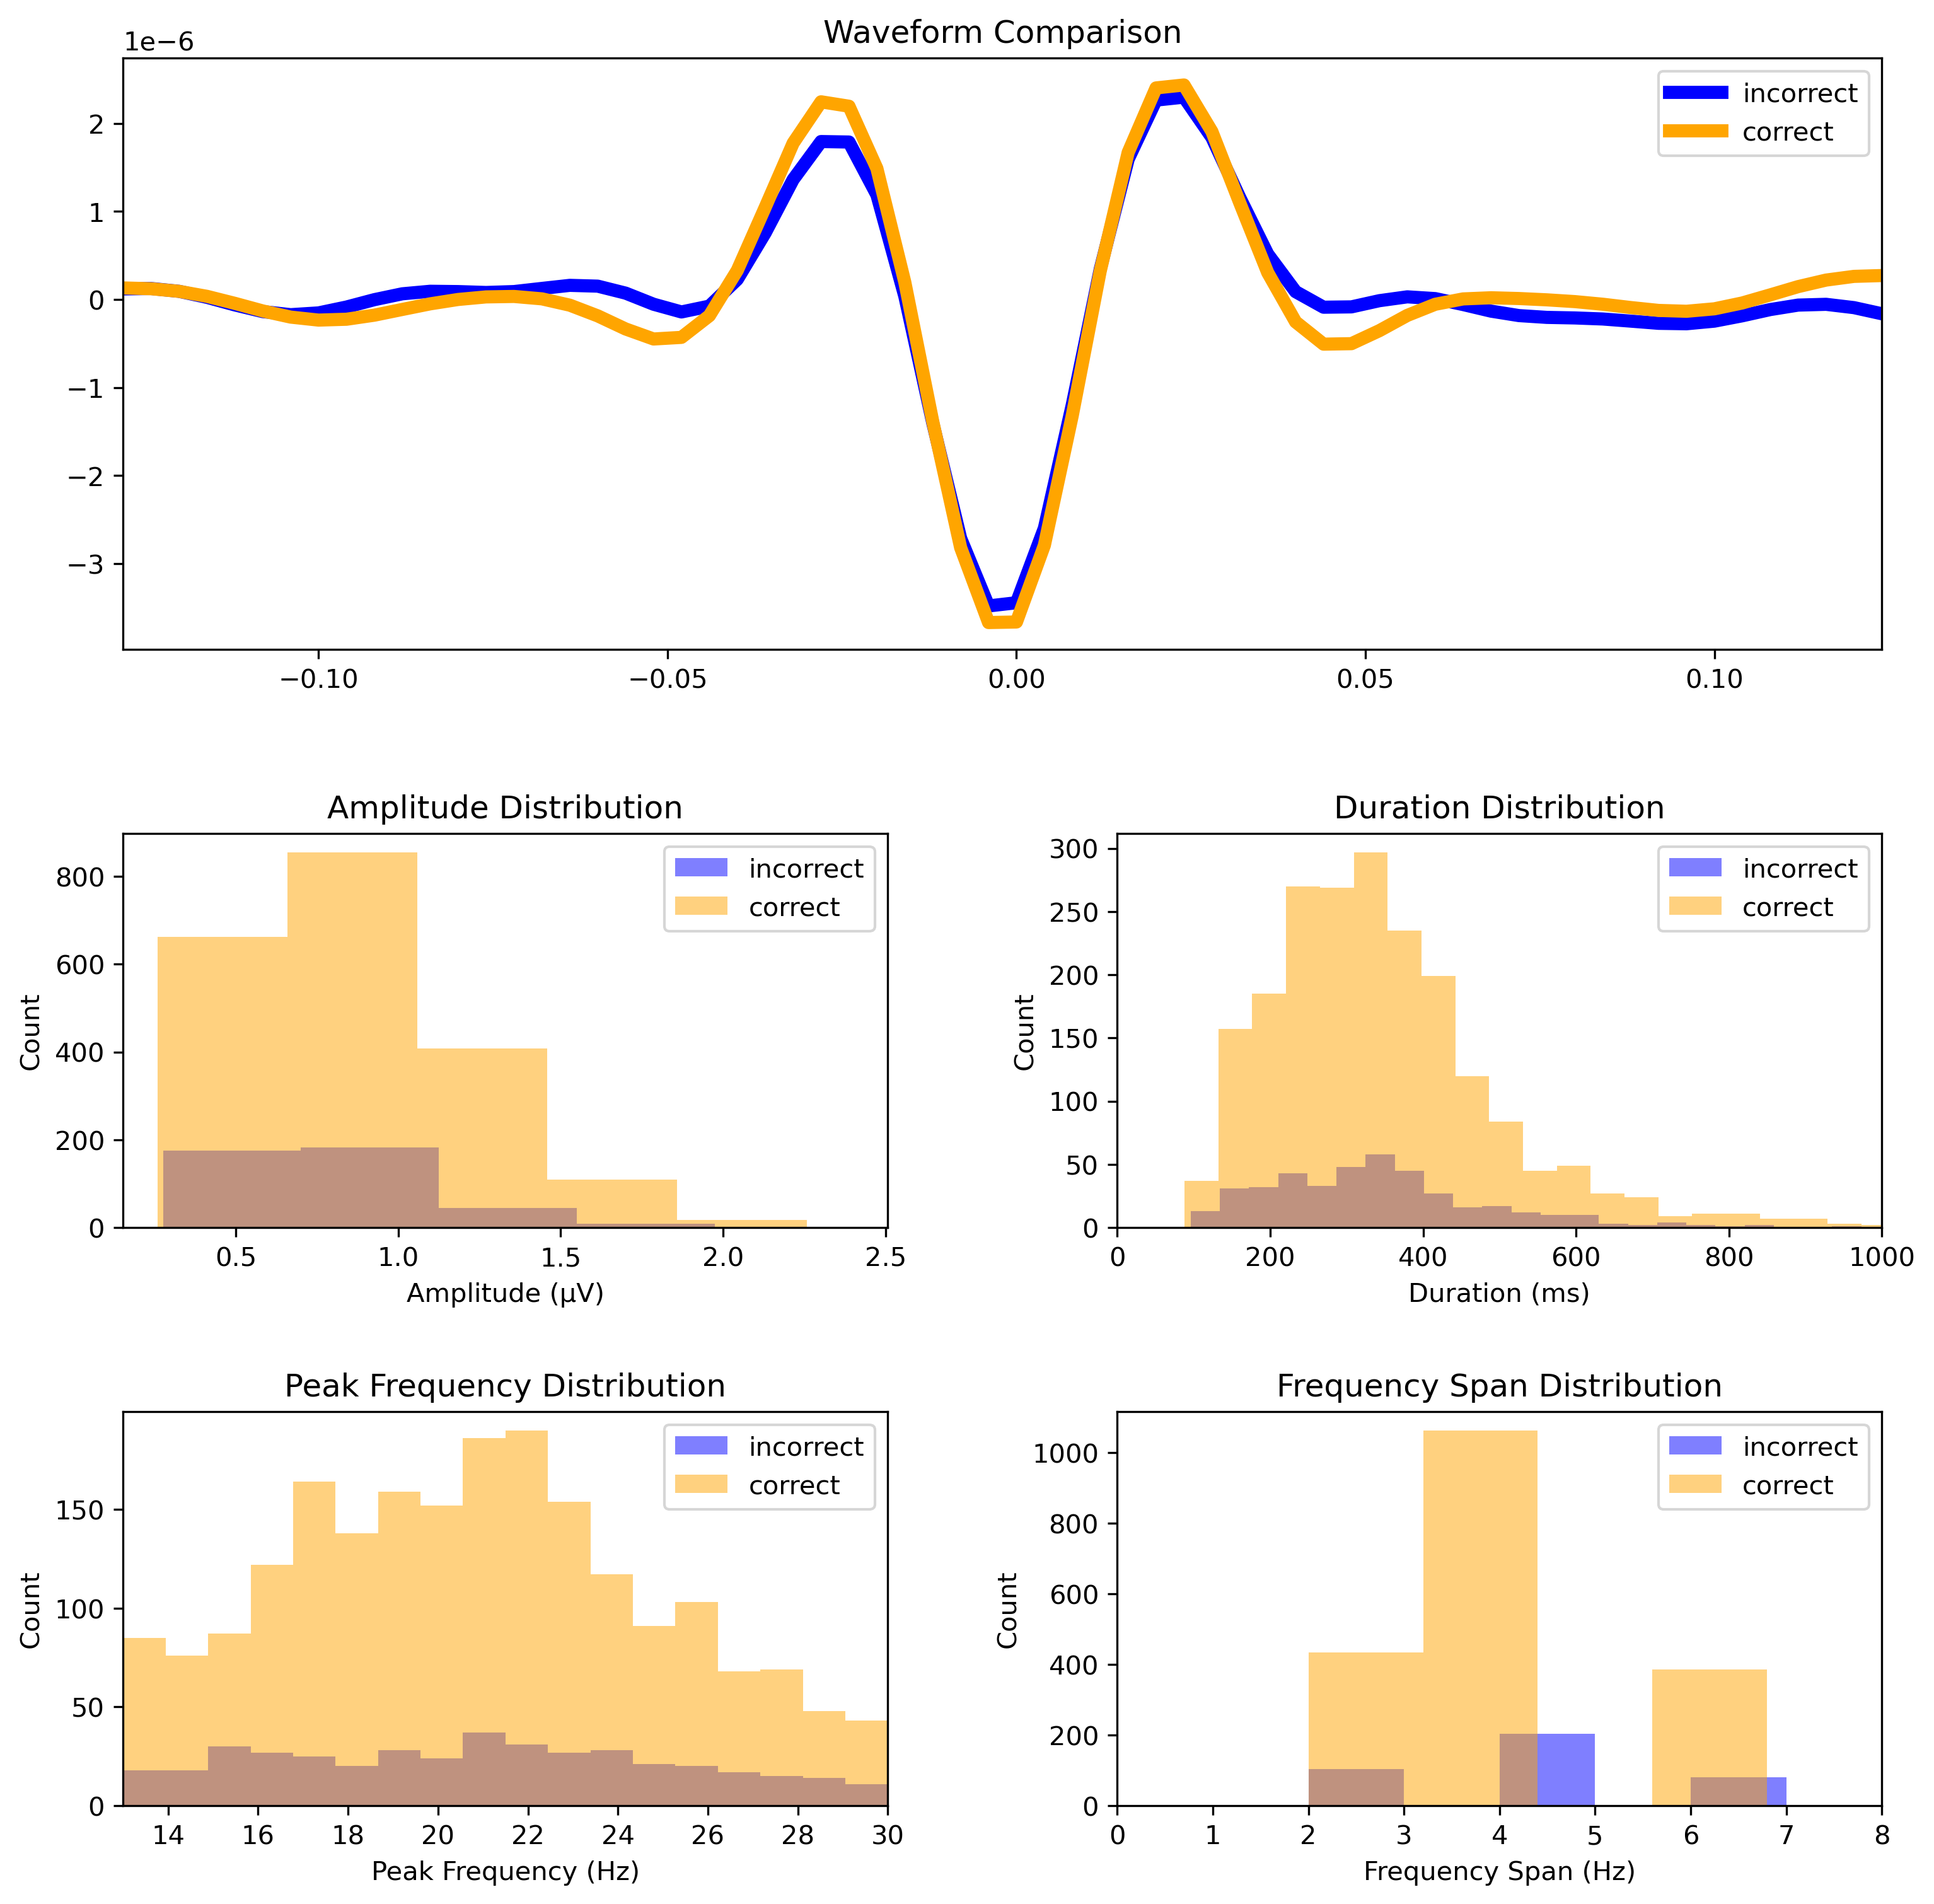

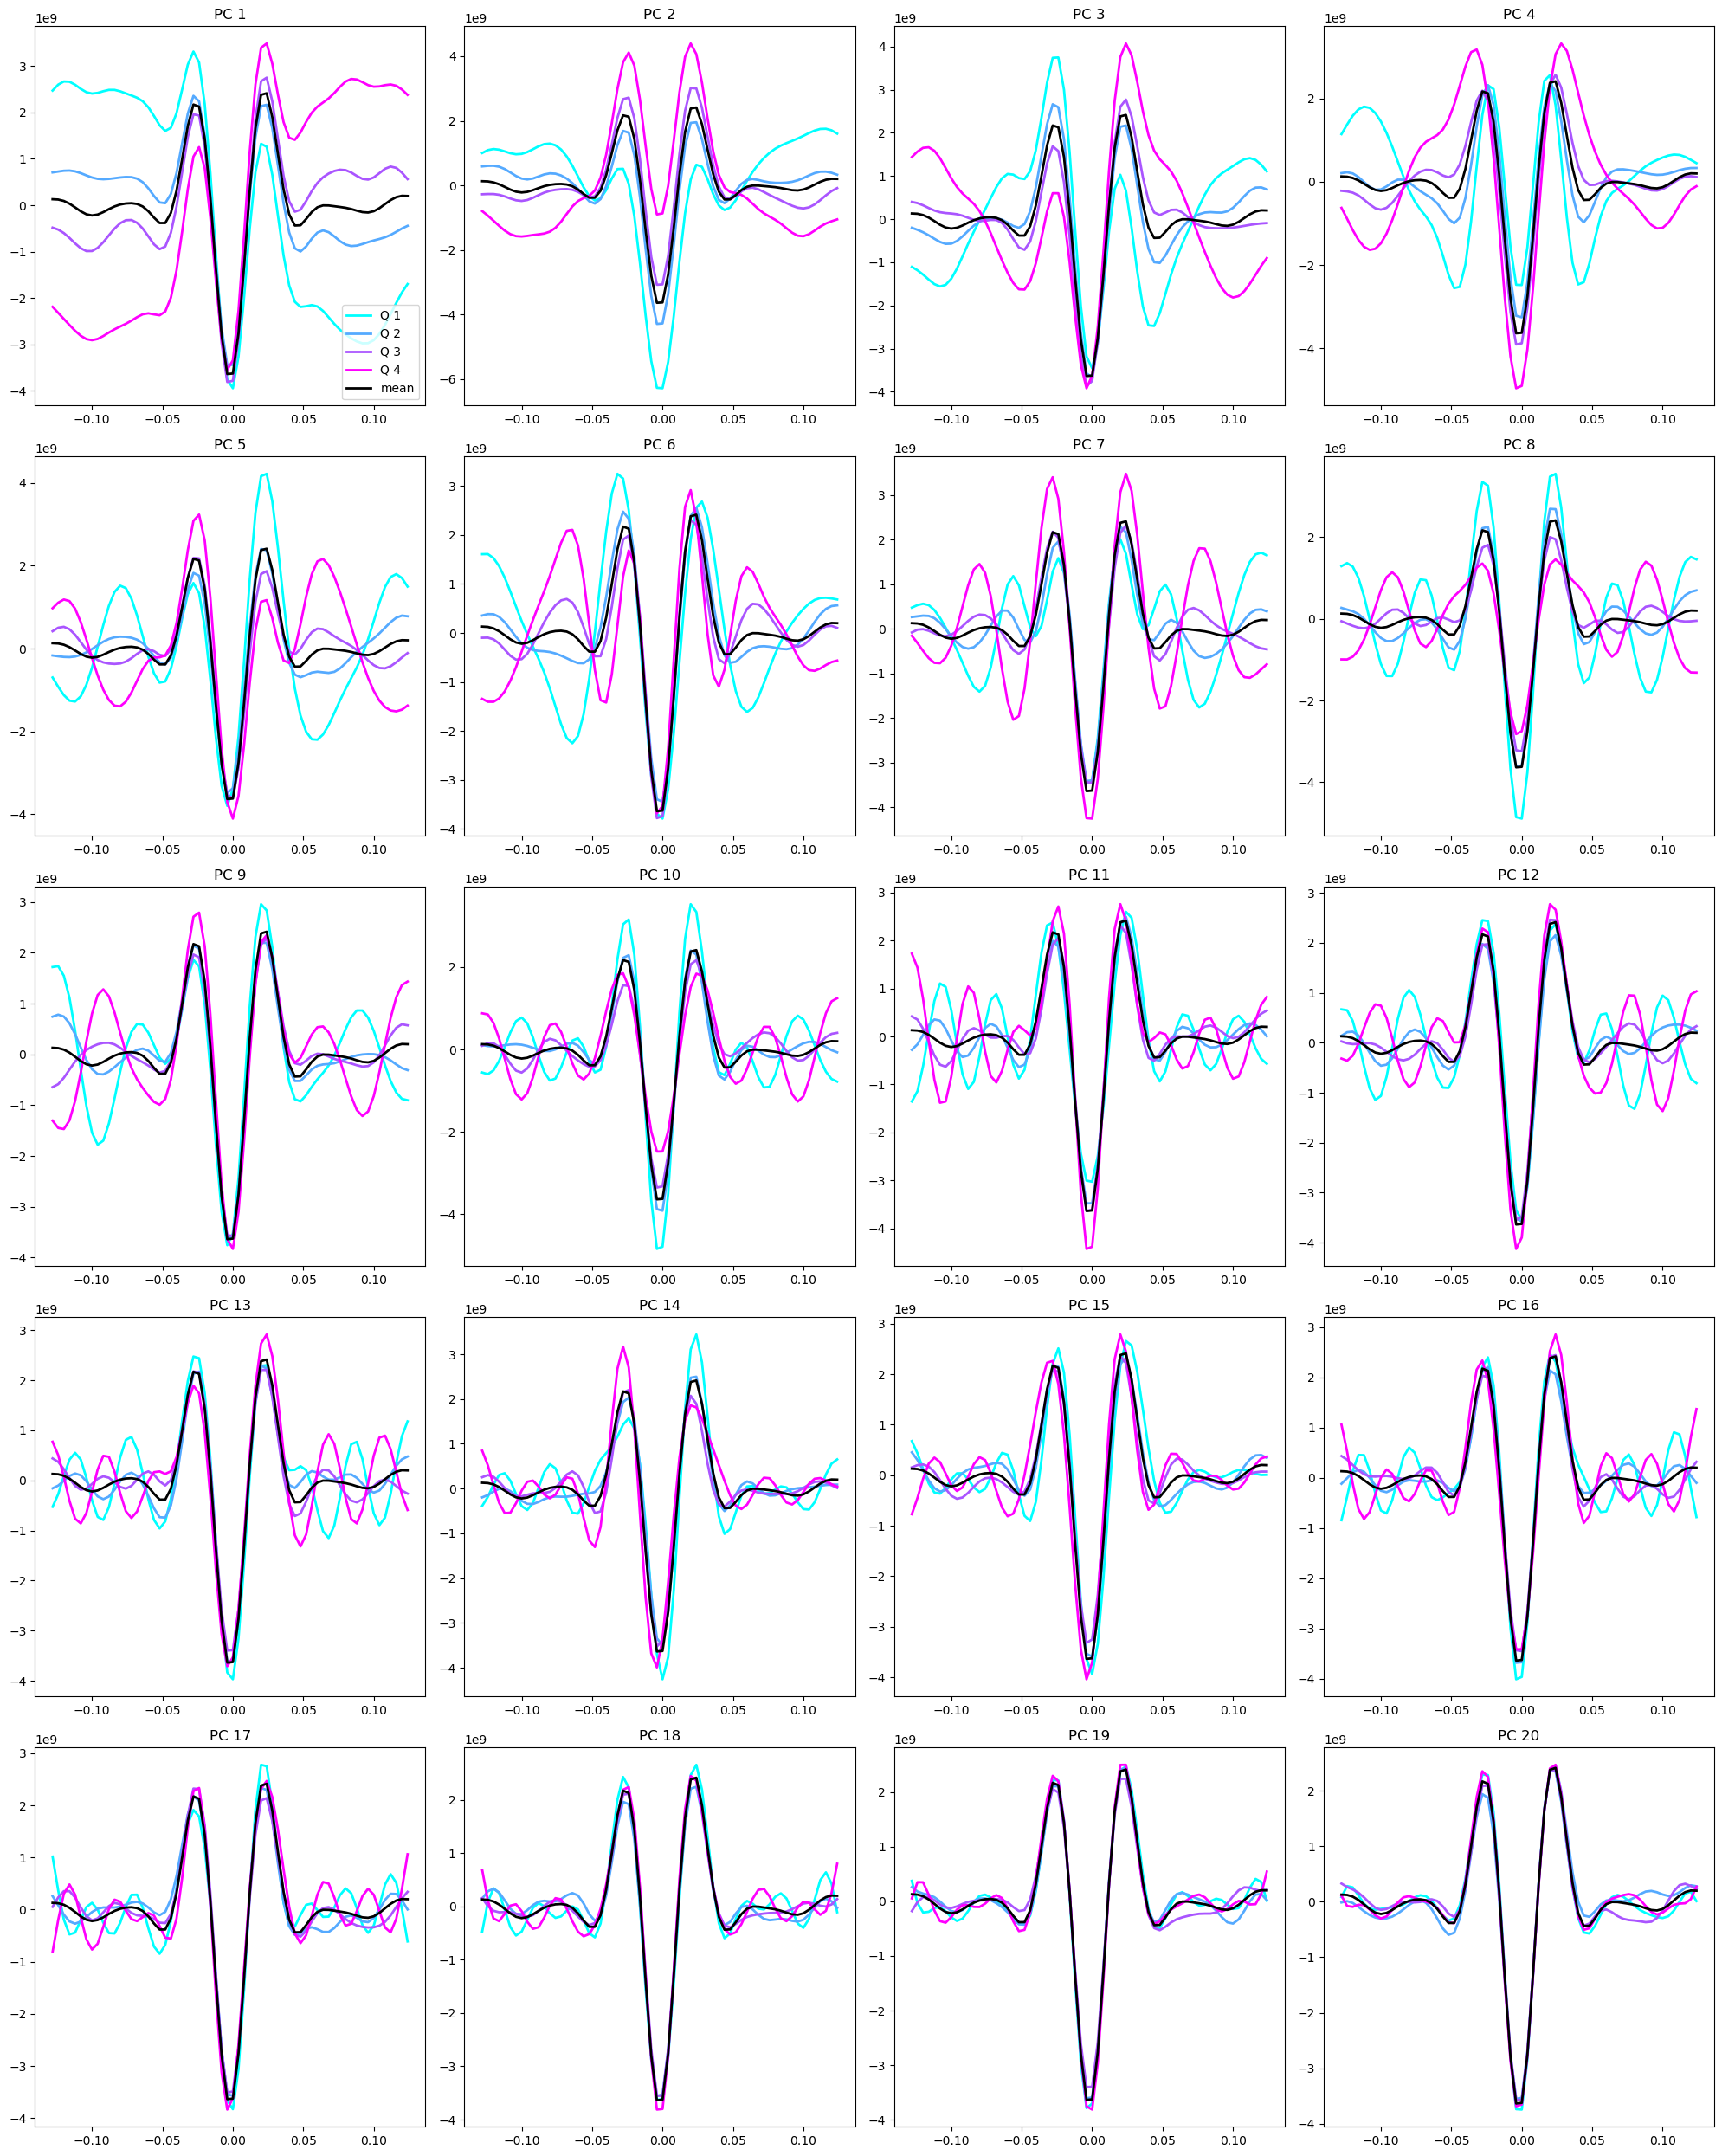

In [ ]:
def many_is_in(multiple, target):
    check_ = []
    for i in multiple:
        check_.append(i in target)
    return any(check_)

root = Path("")
pipeline_name = "burstspipeline"

paths = {
    "deriv": root / "derivatives" / pipeline_name,
    "first_results": root / "derivatives" / pipeline_name / "first_results",
}

# Ensure output folder exists
paths["first_results"].mkdir(parents=True, exist_ok=True)

# --- Get sub-* folders inside derivatives/<pipeline_name> ---
subjects = sorted(
    d.name for d in paths["deriv"].iterdir()
    if d.is_dir() and d.name.startswith("sub-")
)

print(subjects)

for subject in subjects:
    epochs_file = paths["deriv"] / subject / f"{subject}_desc-epochs_eeg.fif"
    if not epochs_file.exists():
        print(f"Missing epochs file for {subject}: {epochs_file}")
        continue

    epochs = mne.read_epochs(epochs_file, preload=True)
    print(f"Loaded {subject}: {epochs}")
    
    
    bursts_all_results = []

    # Define conditions
    conditions = {'incorrect': epochs["108", "109", "118", "119", "128", "129", "138", "139"], 'correct': epochs["106", "107", "116", "117", "126", "127", "136", "137"]}

    sensors = ['C3', 'C4']

    # Burst extraction and analysis
    for condition_name, condition in conditions.items():
        for sensor in sensors:
            # Get data for the current sensor
            times = condition.times
            ch_idx = condition.ch_names.index(sensor)
            trials = condition.get_data()[:, ch_idx, :]

            sfreq = condition.info['sfreq']
            max_freq = 120
            foi = np.linspace(1, max_freq, 120)
            scales = scale_from_period(1 / foi)

            tf_trials = []

            # Compute time-frequency analysis
            for trial in trials:
                tf = superlet(trial, sfreq, scales, 40, c_1=4, adaptive=True)
                tf_trials.append(np.single(np.abs(tf)))
            tf_trials = np.array(tf_trials)

            # Compute average power spectral density (PSD)
            average_psd = np.average(tf_trials, axis=(2, 0))

            # Fit the 1/f-like background
            ff = FOOOF()
            ff.fit(foi, average_psd, [1, 120])
            ap = 10 ** ff._ap_fit  # Aperiodic component

            # Extract bursts
            search_range = np.where((foi >= 10) & (foi <= 33))[0]
            beta_lims = [13, 30]
            bursts = extract_bursts(
                trials, tf_trials[:, search_range], times, 
                foi[search_range], beta_lims, 
                ap[search_range].reshape(-1, 1), sfreq
            )

            # Add metadata to bursts
            bursts['condition'] = np.tile(condition_name, bursts['trial'].shape)
            bursts['sensor'] = np.tile(sensor, bursts['trial'].shape)
            #bursts['subject'] = np.tile(subject, bursts['trial'].shape)
            #bursts['group'] = np.tile(group, bursts['trial'].shape)
            bursts['epochs'] = np.tile('stim', bursts['trial'].shape)

            # Append results
            bursts_all_results.append(bursts)

            # # Plot burst waveforms
            # f, ax = plt.subplots(1, 1, figsize=(5, 5))
            # mean_waveform = np.mean(bursts["waveform"], axis=0)
            # ax.plot(bursts["waveform_times"], bursts["waveform"].T, lw=0.2)
            # ax.plot(bursts["waveform_times"], mean_waveform, lw=1, c="black")
            # ax.set_xlim(bursts["waveform_times"][0], bursts["waveform_times"][-1])
            # ax.set_title(f"{condition_name} - sensor {sensor}")

            waveform_times = bursts_all_results[0]["waveform_times"]

    path = '/Users/zayneb/Library/Mobile Documents/com~apple~CloudDocs/06.INTERNSHIPS/ISC_DANC_LAB/le_zay/derivatives/burstspipeline/first_results/'

    # save bursts_all_results as npy
    np.save(f'{path}bursts_all_results_{subject}.npy', bursts_all_results)

    # save waveform_times
    np.save(f'{path}/waveform_times.npy', waveform_times)
        
    # Prepare the figure with GridSpec layout
    fig = plt.figure(figsize=(12, 12), dpi=300)
    gs = gridspec.GridSpec(3, 2, height_ratios=[1.5, 1, 1], hspace=0.4, wspace=0.3)

    # Filter bursts by condition
    bursts_incorrect = [burst for burst in bursts_all_results if burst['condition'][0] == 'incorrect']
    bursts_correct = [burst for burst in bursts_all_results if burst['condition'][0] == 'correct']

    # Waveform comparison plot (spans the first row)
    ax0 = fig.add_subplot(gs[0, :])  # Span all columns
    waveforms_incorrect = [burst["waveform"] for burst in bursts_incorrect]
    waveforms_correct = [burst["waveform"] for burst in bursts_correct]
    mean_waveform_incorrect = np.mean(np.concatenate(waveforms_incorrect, axis=0), axis=0)
    mean_waveform_correct = np.mean(np.concatenate(waveforms_correct, axis=0), axis=0)
    ax0.plot(waveform_times, mean_waveform_incorrect, lw=5, c="blue", label='incorrect')
    ax0.plot(waveform_times, mean_waveform_correct, lw=5, c="orange", label='correct')
    ax0.set_title("Waveform Comparison")
    ax0.set_xlim(waveform_times[0], waveform_times[-1])
    ax0.legend()

    # Amplitude distribution (top left of second row)
    ax1 = fig.add_subplot(gs[1, 0])
    amplitudes_incorrect = np.concatenate([burst['peak_amp_base'] for burst in bursts_incorrect]) * 1e6  # Convert to µV
    amplitudes_correct = np.concatenate([burst['peak_amp_base'] for burst in bursts_correct]) * 1e6  # Convert to µV
    ax1.hist(amplitudes_incorrect, bins=5, alpha=0.5, color="blue", label="incorrect")
    ax1.hist(amplitudes_correct, bins=5, alpha=0.5, color="orange", label="correct")
    ax1.set_title("Amplitude Distribution")
    ax1.set_xlabel("Amplitude (µV)")
    # ax1.set_xlim(0, 4000)
    ax1.set_ylabel("Count")
    ax1.legend()

    # Duration distribution (top right of second row)
    ax2 = fig.add_subplot(gs[1, 1])
    durations_incorrect = np.concatenate([burst['fwhm_time'] for burst in bursts_incorrect]) * 1e3  # Convert to ms
    durations_correct = np.concatenate([burst['fwhm_time'] for burst in bursts_correct]) * 1e3  # Convert to ms
    ax2.hist(durations_incorrect, bins=30, alpha=0.5, color="blue", label="incorrect")
    ax2.hist(durations_correct, bins=30, alpha=0.5, color="orange", label="correct")
    ax2.set_title("Duration Distribution")
    ax2.set_xlabel("Duration (ms)")
    ax2.set_xlim(0, 1000)
    ax2.set_ylabel("Count")
    ax2.legend()

    # Peak frequency distribution (bottom left)
    ax3 = fig.add_subplot(gs[2, 0])
    peak_freq_incorrect = np.concatenate([burst['peak_freq'] for burst in bursts_incorrect])
    peak_freq_correct = np.concatenate([burst['peak_freq'] for burst in bursts_correct])
    ax3.hist(peak_freq_incorrect, bins=18, alpha=0.5, color="blue", label="incorrect")
    ax3.hist(peak_freq_correct, bins=18, alpha=0.5, color="orange", label="correct")
    ax3.set_title("Peak Frequency Distribution")
    ax3.set_xlabel("Peak Frequency (Hz)")
    ax3.set_ylabel("Count")
    ax3.set_xlim(13, 30)
    ax3.legend()

    # Frequency span distribution (bottom right)
    ax4 = fig.add_subplot(gs[2, 1])
    freq_span_incorrect = np.concatenate([burst['fwhm_freq'] for burst in bursts_incorrect])
    freq_span_correct = np.concatenate([burst['fwhm_freq'] for burst in bursts_correct])
    ax4.hist(freq_span_incorrect, bins=10, alpha=0.5, color="blue", label="incorrect")
    ax4.hist(freq_span_correct, bins=10, alpha=0.5, color="orange", label="correct")
    ax4.set_title("Frequency Span Distribution")
    ax4.set_xlim(0, 8)
    ax4.set_xlabel("Frequency Span (Hz)")
    ax4.set_ylabel("Count")
    ax4.legend()

    plt.tight_layout()
    plt.show()

    
    dict_output = {i: [] for i in bursts_all_results[0].keys() if not many_is_in(["waveform", "waveform_times"], i)}
    waveforms = []

    for b in bursts_all_results:
        [dict_output[k].append(b[k]) for k in dict_output.keys()]
        waveforms.append(b["waveform"])

    for i in dict_output.keys():
        dict_output[i] = np.hstack(dict_output[i])
    waveforms = np.vstack([i for i in waveforms if i.shape[0] > 0])  # all the bursts x time

    amp_max = np.max(waveforms, axis=1)
    amp_map = (amp_max >= np.percentile(amp_max, 0.5)) & (amp_max <= np.percentile(amp_max, 99.5))
    # pca_subset = np.random.choice(np.arange(amp_max.shape[0])[amp_map], size=int(amp_max.shape[0]*0.5))

    model = PCA(n_components=20)
    scaler = RobustScaler().fit(waveforms)
    burst_std = scaler.transform(waveforms)
    model.fit(burst_std)
    pc_scores = model.transform(burst_std)  # all the bursts x 20 components
    pc_labels = ["PC_{}".format(i+1) for i in range(pc_scores.shape[1])]
    pc_df = pd.DataFrame.from_dict({i: pc_scores[:, ix] for ix, i in enumerate(pc_labels)})
    dict_output_df = pd.DataFrame.from_dict(dict_output)
    features_scores = pd.concat([dict_output_df, pc_df], axis=1)

    quartiles = np.linspace(0, 100, num=5)
    quartiles = list(zip(quartiles[:-1], quartiles[1:]))
    col_range = plt.cm.cool(np.linspace(0, 1, num=len(quartiles)))
    mean_waveform = np.mean(waveforms, axis=0)

    f, ax = plt.subplots(5, 4, figsize=(20, 25))
    ax = ax.flatten()
    for pc_ix, pc in enumerate(pc_labels):
        ax[pc_ix].set_title(pc.replace("_", " "))  # set the nice title
        scores = features_scores[pc].values  # select the appropriate principal component from the dataframe
        q_maps = []
        for q_ix, (b, e) in enumerate(quartiles):
            q_map = (scores > np.percentile(scores, b)) & (scores <= np.percentile(scores, e))  # create a boolean map to select the waveforms
            q_mean = np.mean(waveforms[q_map], axis=0)
            ax[pc_ix].plot(waveform_times, q_mean/1e-15, lw=2, c=col_range[q_ix], label="Q {}".format(q_ix+1))
        ax[pc_ix].plot(waveform_times, mean_waveform/1e-15, lw=2, c="black", label="mean")
    ax[0].legend(fontsize=10)

    plt.tight_layout()
    plt.show()
